<a href="https://colab.research.google.com/github/JavierPerrote/DESARROLLO-DE-UN-SENSOR-SOFTWARE-PARA-LA-ESTIMACION-DE-MATERIA-SECA-EN-UN-PROCESO-INDUSTRIAL/blob/main/BoxPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math as math
import scipy.signal
import re
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [ ]:
dataFile = pd.read_csv('sensor.csv')

PRESIONES DEL VAPOR

Porcentaje de valores atípicos en Output: 0.00%
Porcentaje de valores atípicos en P_vah_e1: 0.00%
Porcentaje de valores atípicos en P_vah_e2: 0.00%
Porcentaje de valores atípicos en P_vah_e3: 0.00%
Porcentaje de valores atípicos en P_vah_e4: 0.00%
Porcentaje de valores atípicos en P_vah_e5: 0.00%
Porcentaje de valores atípicos en P_vah_e6: 0.13%
Porcentaje de valores atípicos en p_vap_cald: 0.00%


<Figure size 2000x1500 with 0 Axes>

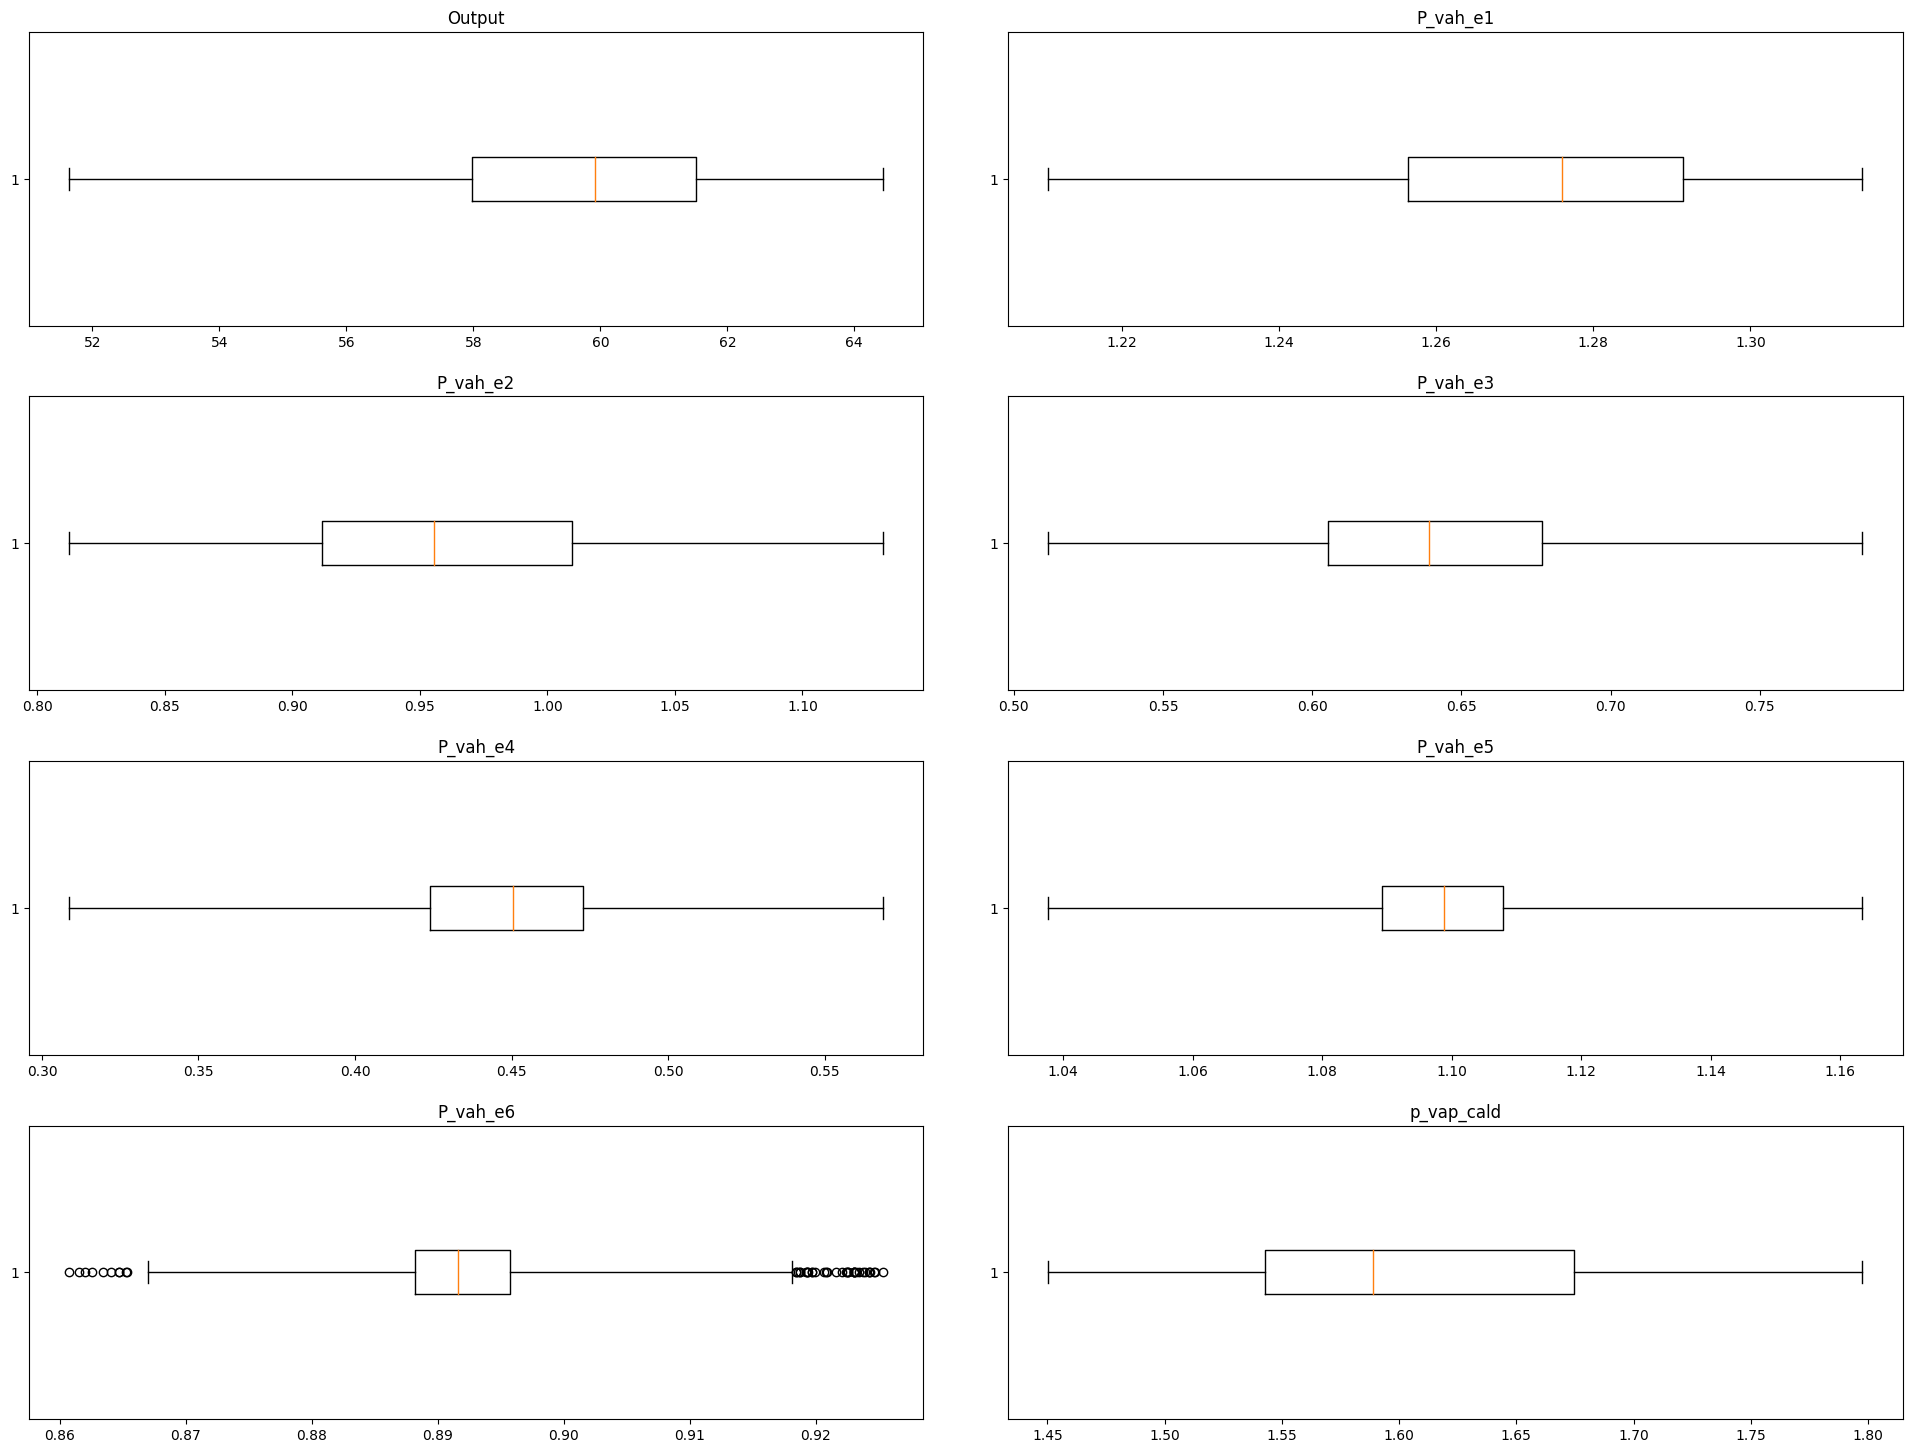

In [ ]:
# presiones
data = dataFile.loc[:,['Output','P_vah_e1','P_vah_e2','P_vah_e3','P_vah_e4','P_vah_e5','P_vah_e6','p_vap_cald']]

nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

for index,column in enumerate(data.columns):
    boxplot = axs[index // ncolumnsG, index % ncolumnsG].boxplot(data[column], vert=False, whis=3)
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    outliers = boxplot["fliers"][0].get_data()[0]
    total = len(data[column])
    outliers_percentage = len(outliers) / total * 100
    print(f"Porcentaje de valores atípicos en {column}: {outliers_percentage:.2f}%")



TEMPERATURAS DEL VAPOR

In [ ]:
# presiones

data = dataFile.loc[:,['T_vah_e1', 'T_vah_e2', 'T_vah_e3',
       'T_vah_e4', 'T_vah_e5', 'T_vah_e6', 'T_vap_cald','T_ent_e1']]

nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

for index,column in enumerate(data.columns):
    boxplot = axs[index // ncolumnsG, index % ncolumnsG].boxplot(data[column], vert=False, whis=3)
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    outliers = boxplot["fliers"][0].get_data()[0]
    total = len(data[column])
    outliers_percentage = len(outliers) / total * 100
    print(f"Porcentaje de valores atípicos en {column}: {outliers_percentage:.2f}%")

TEMPERATURAS DEL JUGO

In [ ]:
# presiones
data =  dataFile.loc[:,['e1_T_jugo_salida',
'e2_T_jugo_salida', 'e3_T_jugo_salida', 'e4_T_jugo_salida',
'e5_T_jugo_salida', 'e6_T_jugo_salida']]

nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

for index,column in enumerate(data.columns):
    boxplot = axs[index // ncolumnsG, index % ncolumnsG].boxplot(data[column], vert=False, whis=3)
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    outliers = boxplot["fliers"][0].get_data()[0]
    total = len(data[column])
    outliers_percentage = len(outliers) / total * 100
    print(f"Porcentaje de valores atípicos en {column}: {outliers_percentage:.2f}%")

TEMPERATURA EN LOS CAMBIADORES

Porcentaje de valores atípicos en T_entrada_R10: 5.11%
Porcentaje de valores atípicos en T_entrada_R13: 0.06%
Porcentaje de valores atípicos en T_entrada_R14: 0.00%
Porcentaje de valores atípicos en T_entrada_R3: 0.00%
Porcentaje de valores atípicos en T_entrada_R3B: 0.00%
Porcentaje de valores atípicos en T_entrada_R8: 0.00%
Porcentaje de valores atípicos en T_entrada_R9: 0.21%
Porcentaje de valores atípicos en T_jugo_anteevap: 5.11%


<Figure size 2000x1500 with 0 Axes>

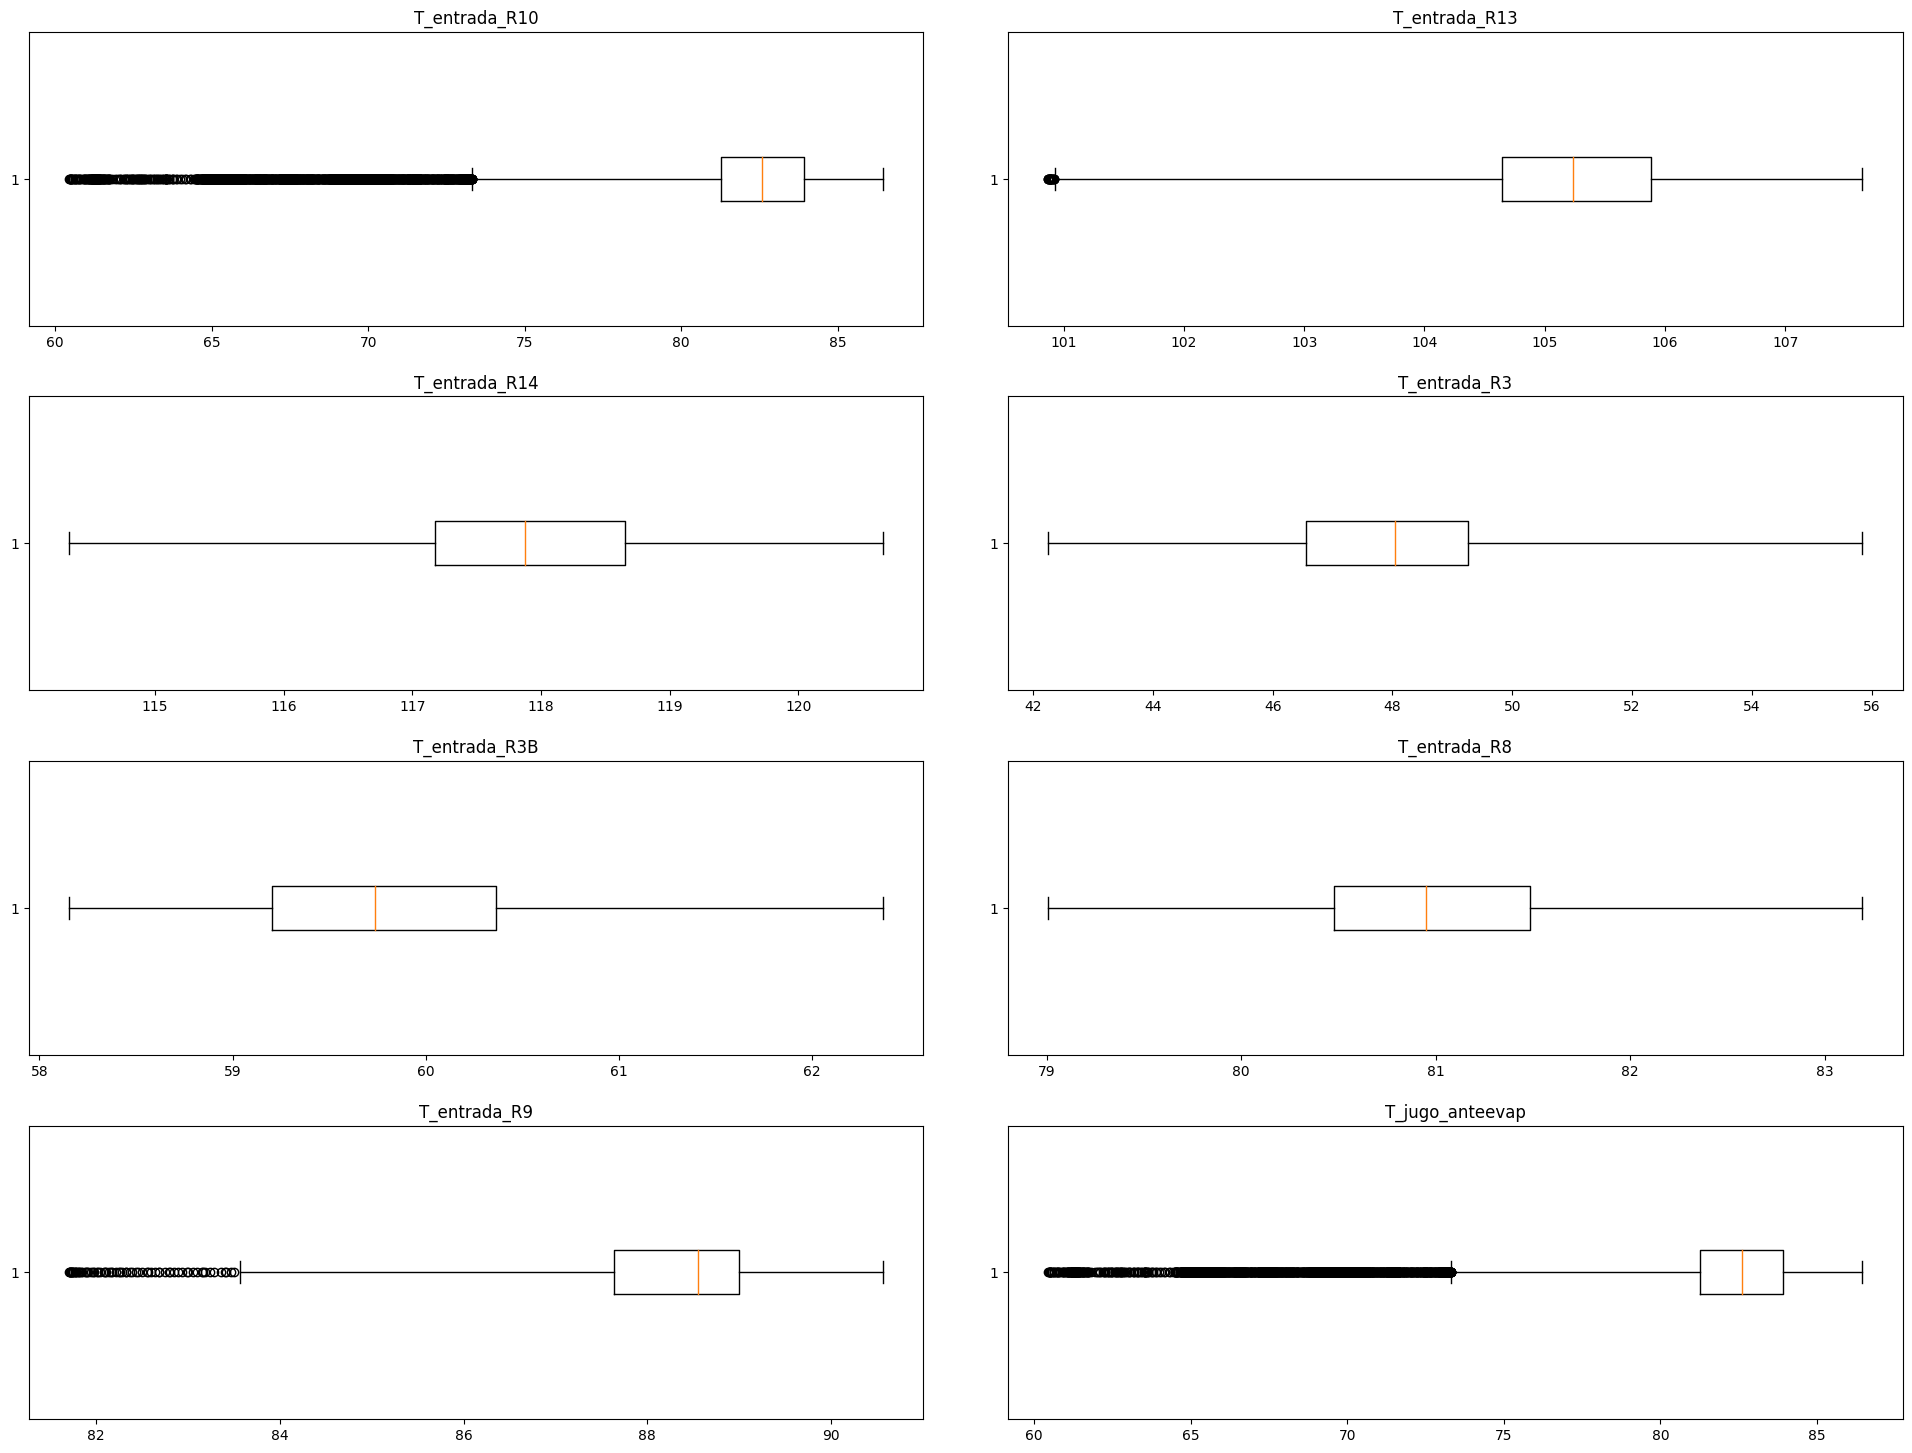

In [ ]:
# presiones

data = dataFile.loc[:,['T_entrada_R10', 'T_entrada_R13',
       'T_entrada_R14', 'T_entrada_R3', 'T_entrada_R3B', 'T_entrada_R8',
       'T_entrada_R9', 'T_jugo_anteevap']]

nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

for index,column in enumerate(data.columns):
    boxplot = axs[index // ncolumnsG, index % ncolumnsG].boxplot(data[column], vert=False, whis=3)
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    outliers = boxplot["fliers"][0].get_data()[0]
    total = len(data[column])
    outliers_percentage = len(outliers) / total * 100
    print(f"Porcentaje de valores atípicos en {column}: {outliers_percentage:.2f}%")

In [ ]:
# presiones


data = dataFile.loc[:,[ 'T_salida_R10', 'T_salida_R11',
       'T_salida_R12', 'T_salida_R3', 'T_salida_R3A', 'T_salida_R3B']]
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

for index,column in enumerate(data.columns):
    boxplot = axs[index // ncolumnsG, index % ncolumnsG].boxplot(data[column], vert=False, whis=3)
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    outliers = boxplot["fliers"][0].get_data()[0]
    total = len(data[column])
    outliers_percentage = len(outliers) / total * 100
    print(f"Porcentaje de valores atípicos en {column}: {outliers_percentage:.2f}%")

In [ ]:
# presiones


data = dataFile.loc[:,[
       'T_salida_R4', 'T_salida_R5', 'T_salida_R6', 'T_salida_R7',
       'T_salida_R8', 'T_salida_R9']]
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

for index,column in enumerate(data.columns):
    boxplot = axs[index // ncolumnsG, index % ncolumnsG].boxplot(data[column], vert=False, whis=3)
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    outliers = boxplot["fliers"][0].get_data()[0]
    total = len(data[column])
    outliers_percentage = len(outliers) / total * 100
    print(f"Porcentaje de valores atípicos en {column}: {outliers_percentage:.2f}%")

FLUJO MASICO

Porcentaje de valores atípicos en W_jugo_R10: 0.03%
Porcentaje de valores atípicos en W_jugo_R3: 1.05%
Porcentaje de valores atípicos en W_jugo_R3B: 0.38%
Porcentaje de valores atípicos en W_jugo_R4: 0.38%
Porcentaje de valores atípicos en W_jugo_R8: 0.38%
Porcentaje de valores atípicos en W_jugo_R9: 0.38%
Porcentaje de valores atípicos en W_jugo_anteevap: 0.03%
Porcentaje de valores atípicos en W_jugo_salida_e6: 0.00%
Porcentaje de valores atípicos en W_vap_cald: 0.00%


<Figure size 2000x1500 with 0 Axes>

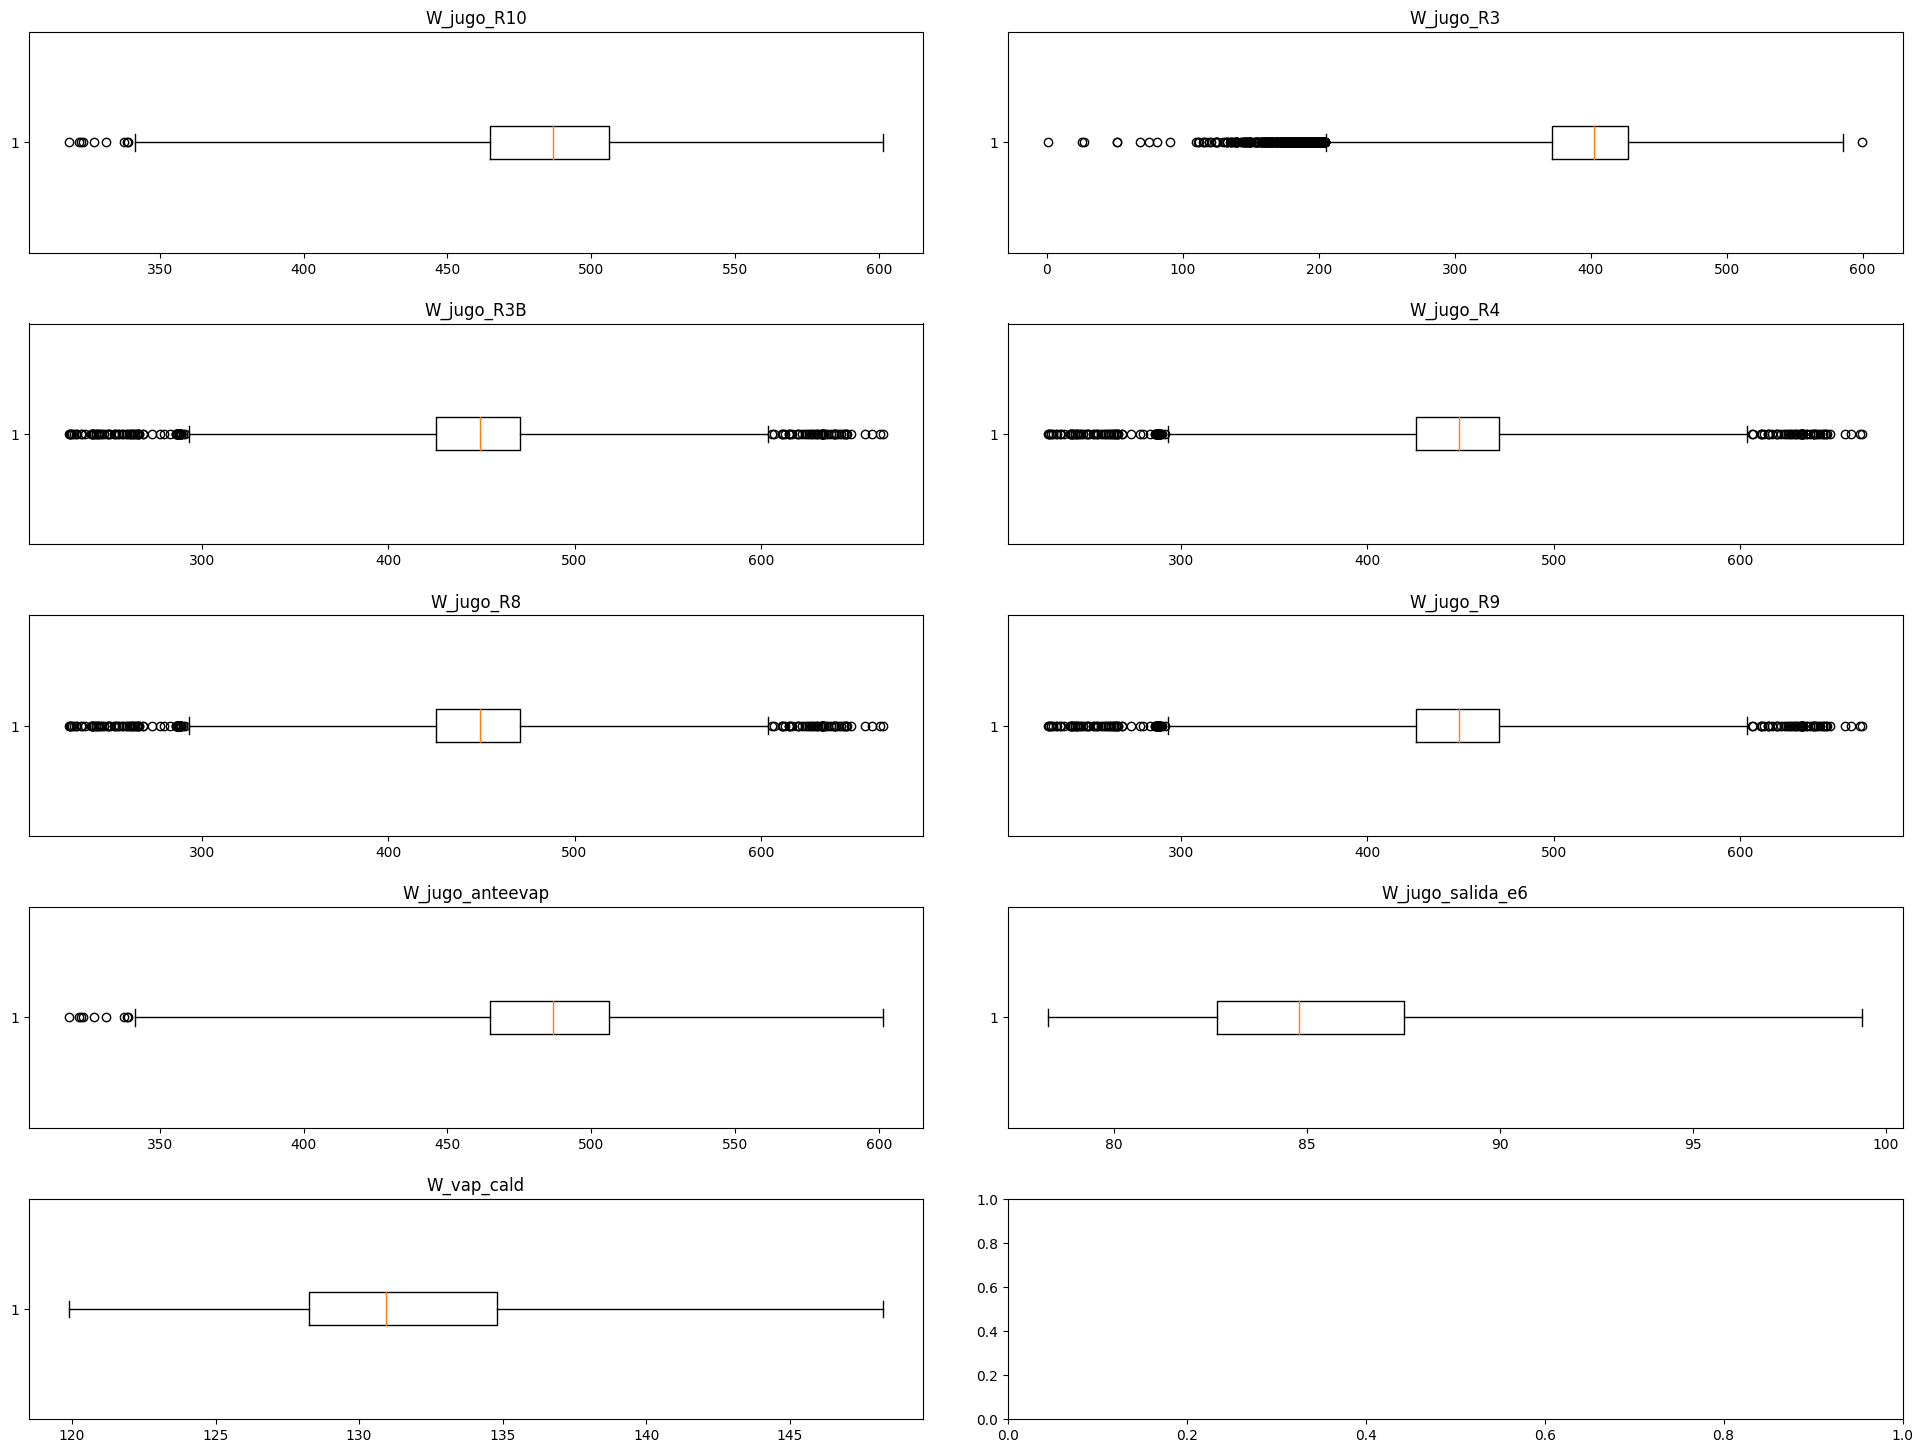

In [ ]:
# presiones
data =  dataFile.loc[:,['W_jugo_R10',
       'W_jugo_R3', 'W_jugo_R3B', 'W_jugo_R4', 'W_jugo_R8', 'W_jugo_R9',
       'W_jugo_anteevap', 'W_jugo_salida_e6', 'W_vap_cald']]

nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

for index,column in enumerate(data.columns):
    boxplot = axs[index // ncolumnsG, index % ncolumnsG].boxplot(data[column], vert=False, whis=3)
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    outliers = boxplot["fliers"][0].get_data()[0]
    total = len(data[column])
    outliers_percentage = len(outliers) / total * 100
    print(f"Porcentaje de valores atípicos en {column}: {outliers_percentage:.2f}%")